In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.describe()
#median<mean for sales which mean data is postively skewed
#mean<media

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Preprocessing and EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#looking for null values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#IDs are not a metric to determine sales
data=data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [7]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [64]:
#working with null values
data['Item_Weight'].fillna(data['Item_Weight'].median(),inplace=True)
data['Outlet_Size'].fillna(data['Item_Weight'].mode()[0],inplace=True)

data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

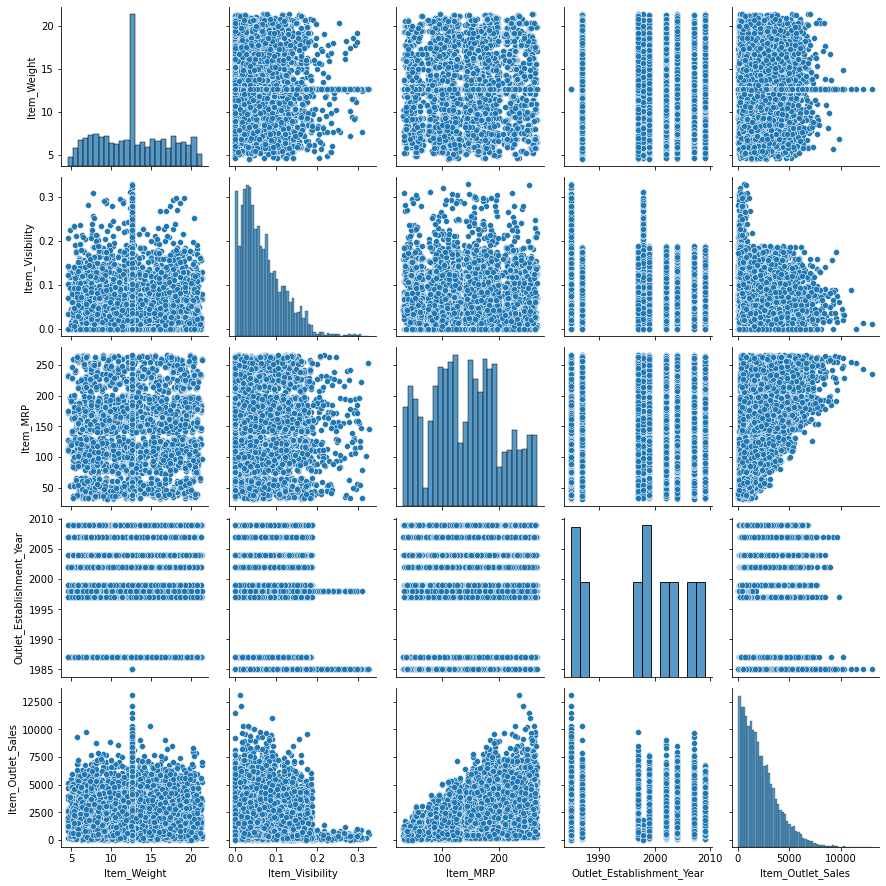

In [65]:
#EDA
sns.pairplot(data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [66]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
col=data.Item_Fat_Content
data.Item_Fat_Content[(col == 'low fat')|(col == 'LF')]='Low Fat'
data.Item_Fat_Content[col == 'reg']='Regular'

<ipython-input-13-a583e6cdbf96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Item_Fat_Content[(col == 'low fat')|(col == 'LF')]='Low Fat'
<ipython-input-13-a583e6cdbf96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Item_Fat_Content[col == 'reg']='Regular'


In [14]:
col.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [15]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [16]:
data.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [17]:
data.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [18]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


<BarContainer object of 8523 artists>

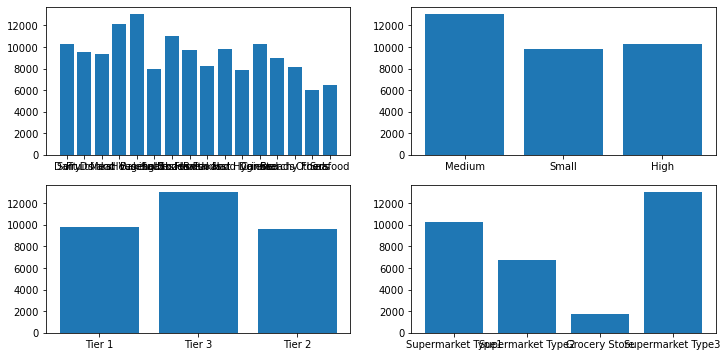

In [67]:
f=plt.figure(figsize=(12,6))
p1=f.add_subplot(221)
p2=f.add_subplot(222)
p3=f.add_subplot(223)
p4=f.add_subplot(224)
p1.bar(data['Item_Type'],data['Item_Outlet_Sales'])
p2.bar(data['Outlet_Size'],data['Item_Outlet_Sales'])
p3.bar(data['Outlet_Location_Type'],data['Item_Outlet_Sales'])
p4.bar(data['Outlet_Type'],data['Item_Outlet_Sales'])


<BarContainer object of 8523 artists>

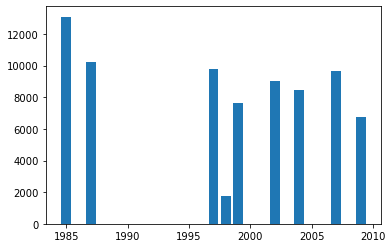

In [68]:
plt.bar(data['Outlet_Establishment_Year'],data['Item_Outlet_Sales'])

## LinearRegression Model1

In [69]:
X=data[['Item_Weight','Item_Visibility','Item_MRP','Item_Fat_Content','Item_Type','Outlet_Establishment_Year',\
       'Outlet_Size','Outlet_Location_Type','Outlet_Type']]
Y=data['Item_Outlet_Sales']
#encoding the for non-quantitive data
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
X['Item_Type']=le.fit_transform(X['Item_Type'])
X['Outlet_Establishment_YeaY']=le.fit_transform(X['Outlet_Establishment_Year'])
X['Item_Fat_Content']=le.fit_transform(X['Item_Fat_Content'])
X['Outlet_Size']=le.fit_transform(X['Outlet_Size'])
X['Outlet_Type']=le.fit_transform(X['Outlet_Type'])
X['Outlet_Location_Type']=le.fit_transform(X['Outlet_Location_Type'])
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X

<ipython-input-69-27d31949193d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Item_Type']=le.fit_transform(X['Item_Type'])


,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Establishment_YeaY
0,9.300,0.016047,249.8092,0,4,1999,1,0,1,4
1,5.920,0.019278,48.2692,1,14,2009,1,2,2,8
2,17.500,0.016760,141.6180,0,10,1999,1,0,1,4
3,19.200,0.000000,182.0950,1,6,1998,2,2,0,3
4,8.930,0.000000,53.8614,0,9,1987,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,0,13,1987,0,2,1,1
8519,8.380,0.046982,108.1570,1,0,2002,2,1,1,5
8520,10.600,0.035186,85.1224,0,8,2004,2,1,1,6
8521,7.210,0.145221,103.1332,1,13,2009,1,2,2,8


In [70]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df


2179.0133069228514


,Coefficient
Item_Weight,-7.127851
Item_Visibility,-86.903530
Item_MRP,970.809912
Item_Fat_Content,22.782454
Item_Type,1.462512
Outlet_Establishment_Year,74.879896
Outlet_Size,-89.743220
Outlet_Location_Type,-236.598415
Outlet_Type,749.131631
Outlet_Establishment_YeaY,-51.644908


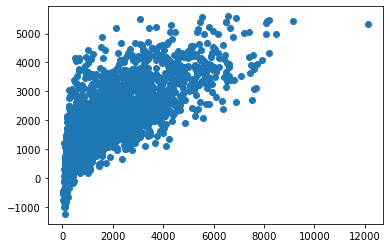

In [71]:
pred1=lm.predict(X_test)
plt.scatter(Y_test,pred1)

## LinearRegression Model2 + more data refining

In [26]:

data2=pd.read_csv('Train.csv')
print(data2.isnull().sum())

#Item_weight can be dependent on Item_Type so lets try filling null-values of item_Weight with respective means of Item_type
data2.groupby(['Item_Type']).agg({'Item_Weight':'mean'})

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [27]:

Item_means=data2.groupby('Item_Type').agg({'Item_Weight':'mean'})
print(Item_means.index,"\n",Item_means.columns)
Items=Item_means.index
means=Item_means['Item_Weight'].values
#filling ITem_Weight null values with the mean of Item_Weight the for the Item_Type for which the value is null
for i in range(len(Items)):
    data2.loc[(data2['Item_Weight'].isnull()) & (data2['Item_Type']==Items[i])] = data2.loc\
                        [(data2['Item_Weight'].isnull()) & (data2['Item_Type']==Items[i])].fillna(means[i])
# data2['Item_Weight'].fillna(data2['Item_Weight'].median(),inplace=True)
data2.isnull().sum()

Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object', name='Item_Type') 
 Index(['Item_Weight'], dtype='object')


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

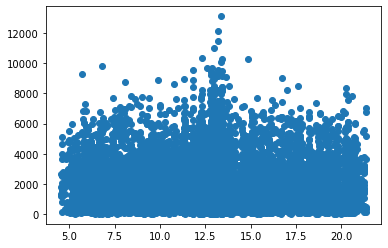

In [28]:
plt.scatter(data2.Item_Weight,data2.Item_Outlet_Sales)

In [29]:
data2['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [30]:
Outlets=data2['Outlet_Identifier'].unique()
for x in Outlets:
    print(data2[data2['Outlet_Identifier'] == x][['Outlet_Identifier','Outlet_Size']].head(2))
''' we see that outlets 10,45,17 have nan values '''


  Outlet_Identifier Outlet_Size
0            OUT049      Medium
2            OUT049      Medium
  Outlet_Identifier Outlet_Size
1            OUT018      Medium
5            OUT018      Medium
   Outlet_Identifier Outlet_Size
3             OUT010         NaN
28            OUT010         NaN
  Outlet_Identifier Outlet_Size
4            OUT013        High
6            OUT013        High
   Outlet_Identifier Outlet_Size
7             OUT027      Medium
18            OUT027      Medium
   Outlet_Identifier Outlet_Size
8             OUT045         NaN
33            OUT045         NaN
   Outlet_Identifier Outlet_Size
9             OUT017         NaN
25            OUT017         NaN
   Outlet_Identifier Outlet_Size
11            OUT046       Small
13            OUT046       Small
   Outlet_Identifier Outlet_Size
19            OUT035       Small
22            OUT035       Small
   Outlet_Identifier Outlet_Size
23            OUT019       Small
29            OUT019       Small


' we see that outlets 10,45,17 have nan values '

In [31]:
data2[(data2['Outlet_Identifier']=='OUT010')][['Outlet_Location_Type','Outlet_Type']].head(1)

,Outlet_Location_Type,Outlet_Type
3,Tier 3,Grocery Store


In [32]:
data2[(data2['Outlet_Identifier']=='OUT045')][['Outlet_Location_Type','Outlet_Type']].head(1)

,Outlet_Location_Type,Outlet_Type
8,Tier 2,Supermarket Type1


In [33]:
data2[(data2['Outlet_Identifier']=='OUT017')][['Outlet_Location_Type','Outlet_Type']].head(1)

,Outlet_Location_Type,Outlet_Type
9,Tier 2,Supermarket Type1


In [34]:
#for OUT010
data2[data2.Outlet_Type == 'Grocery Store']['Outlet_Size'].mode()


0    Small
dtype: object

In [35]:
#for OUT045 and OUT017
data2[(data2.Outlet_Type == 'Supermarket Type1')&(data2.Outlet_Location_Type == 'Tier 2')]['Outlet_Size'].mode()

0    Small
dtype: object

In [36]:
data2['Outlet_Size'].fillna('Small',inplace=True)
data2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [73]:
#number of years since establishment may be a better metric
data2['Years_Establishment']=2013-data2['Outlet_Establishment_Year']

<ipython-input-50-357102628595>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Years_Establishment']=le.fit_transform(X2['Years_Establishment'])
<ipython-input-50-357102628595>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Item_Type']=le.fit_transform(X2['Item_Type'])
<ipython-input-50-357102628595>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

'\nSeems like refining lead to  slighty worse effect '

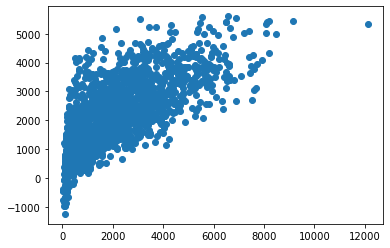

In [50]:
X2=data2[['Item_Weight','Item_Visibility','Item_MRP','Item_Fat_Content','Item_Type','Years_Establishment',\
       'Outlet_Size','Outlet_Location_Type','Outlet_Type']]
Y2=data2['Item_Outlet_Sales']
X2['Years_Establishment']=le.fit_transform(X2['Years_Establishment'])
X2['Item_Type']=le.fit_transform(X2['Item_Type'])
X2['Item_Fat_Content']=le.fit_transform(X2['Item_Fat_Content'])
X2['Outlet_Size']=le.fit_transform(X2['Outlet_Size'])
X2['Outlet_Type']=le.fit_transform(X2['Outlet_Type'])
X2['Outlet_Location_Type']=le.fit_transform(X2['Outlet_Location_Type'])
X2_train, X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.2,random_state=0)
lm2=LinearRegression()
lm2.fit(X2_train,Y2_train)
pred2=lm2.predict(X2_test)
plt.scatter(Y2_test,pred2)

'''
Seems like refining lead to  slighty worse effect '''

In [40]:
Y_train=Y_train.astype(int)

## DecisionTree

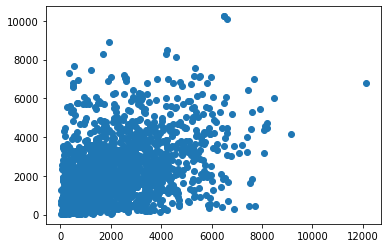

In [52]:
#will be using X_train and Y_train from LinearRegression model as 2nd model didnt gave any better result

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
pred3 = classifier.predict(X_test)
plt.scatter(Y_test,pred3)

## DecisionTree with GridCv

In [48]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(12,50 )), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=0), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 114 candidates, totalling 342 fits


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 342 out of 342 | elapsed:  1.5min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_leaf_nodes': [12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, 31, 32, 33, 34, 35, 36, 37, 38,
                                            39, 40, 41, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [51]:
grid_search_cv.best_params_

{'max_leaf_nodes': 46, 'min_samples_split': 2}

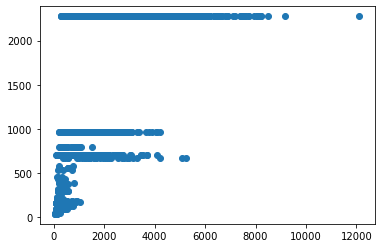

In [54]:
pred4 = grid_search_cv.predict(X_test)
plt.scatter(Y_test,pred4)

## RandomForestClassifier

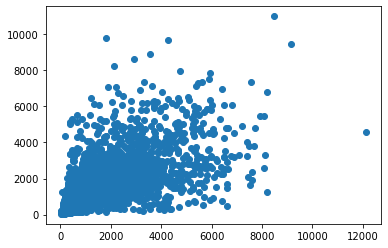

In [55]:
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, Y_train)
pred5=classifier2.predict(X_test)
plt.scatter(Y_test,pred5)

# Reports of 5 Models based

In [62]:
from sklearn import metrics
def test(test,pred):
    print('MAE:', metrics.mean_absolute_error(test, pred))
    print('MSE:', metrics.mean_squared_error(test, pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(test, pred)))
    
def line():
    for x in range(50):
        print('-',end="")
    print("\n")

In [72]:
print('LinearRegression1')
test(Y_test,pred1)
line()
print('LinearRegression2')
test(Y_test,pred2)
line()
print('DecisionTreeClassifier')
test(Y_test,pred3)
line()
print('DecisionTreeClassifier with Grid_cv')
test(Y_test,pred4)
line()
print('RandomForestRegressor')
test(Y_test,pred5)



LinearRegression1
MAE: 915.9801694997703
MSE: 1446866.5508423983
RMSE: 1202.8576602584358
--------------------------------------------------

LinearRegression2
MAE: 916.2393564391865
MSE: 1447342.4497353777
RMSE: 1203.0554641143433
--------------------------------------------------

DecisionTreeClassifier
MAE: 1258.932475894428
MSE: 3127524.2325045643
RMSE: 1768.4807696168382
--------------------------------------------------

DecisionTreeClassifier with Grid_cv
MAE: 995.9122680351906
MSE: 2202410.0424893154
RMSE: 1484.0519002007024
--------------------------------------------------

RandomForestRegressor
MAE: 1082.9394408211144
MSE: 2495938.54098433
RMSE: 1579.853961916838


The LinearRegression models are  better than others evident from the fact
that the other models are inherently for classification based problems, although the RMSE of LinearRegressor is still quite high.